In [22]:
import pandas as pd
df = pd.read_csv('d:/data/cali_housing1.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [23]:
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [25]:
# Train the initial decision tree in the ensemble. This tree is called the base learner. 
# It is regulated with max_depth=1. So, the tree is specially called a decision stump.


from sklearn.tree import DecisionTreeRegressor

# 1st tree in the ensemble
tree_1 = DecisionTreeRegressor(max_depth=1, 
                               random_state=1)
tree_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=1)

In [26]:
tree_1_pred = tree_1.predict(X_train)

In [27]:
tree_1_residuals = y_train - tree_1_pred

In [28]:
# Train the second tree on the first tree’s residuals, make predictions and calculate the residuals.

# 2nd tree in the ensemble
tree_2 = DecisionTreeRegressor(max_depth=1, 
                               random_state=1)

tree_2.fit(X_train, tree_1_residuals)
tree_2_pred = tree_2.predict(X_train)
tree_2_residuals = tree_1_residuals - tree_2_pred

In [29]:
# Likewise, we can train the third tree on the second tree’s residuals, make predictions and calculate the residuals.

# 3rd tree in the ensemble
tree_3 = DecisionTreeRegressor(max_depth=1, 
                               random_state=1)

tree_3.fit(X_train, tree_2_residuals)
tree_3_pred = tree_3.predict(X_train)
tree_3_residuals = tree_2_residuals - tree_3_pred

In [30]:
# After the third iteration, we can calculate the RMSE value.

y1_pred = tree_1.predict(X_test)
y2_pred = tree_2.predict(X_test)
y3_pred = tree_3.predict(X_test)

y_pred = y1_pred + y2_pred + y3_pred

from sklearn.metrics import mean_squared_error as MSE

RMSE = MSE(y_test, y_pred)**0.5
RMSE

0.8590536771784615

In [34]:
# Scikit-learn implementation of gradient boosting

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100,
                               max_depth=1,
                               learning_rate=1.0)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

RMSE= MSE(y_test, y_pred)**0.5
RMSE

0.4837291010690187

The RMSE value has been significantly reduced after using 100 iterations! However, it also depends on max_depth and learning_rate as well. Let’s measure the effect of each hyperparameter.

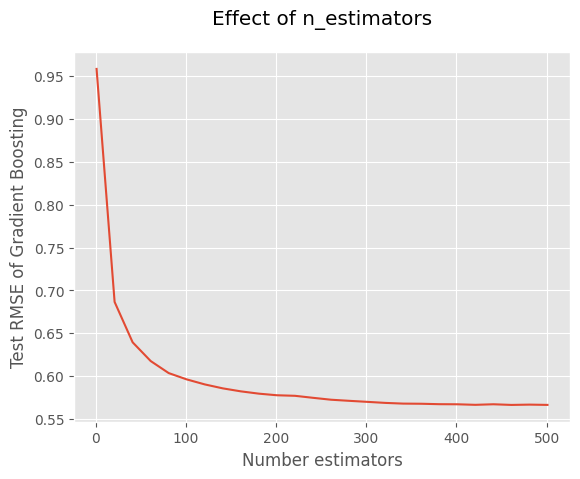

In [33]:
# Measure the effect of n_estimators

# In the range of 1 to 500, we’ll measure the effect of n_estimators and plot the test RMSE values given by the gradient 
# boosting model.

x = list(range(1, 520, 20))
y = []

for i in x:
  gb = GradientBoostingRegressor(n_estimators=i,
                                 max_depth=1,
                                 learning_rate=1.0)
  
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)

  RMSE= MSE(y_test, y_pred)**0.5
  y.append(RMSE)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.title("Effect of n_estimators", pad=20)
plt.xlabel("Number estimators")
plt.ylabel("Test RMSE of Gradient Boosting")
plt.plot(x, y)

The RMSE value gradually decreases when increasing the number of estimators and keeps constant after 400 iterations. It is better to select a value between 300 and 500. If you select an even higher value, the model will take much time to complete the training process.

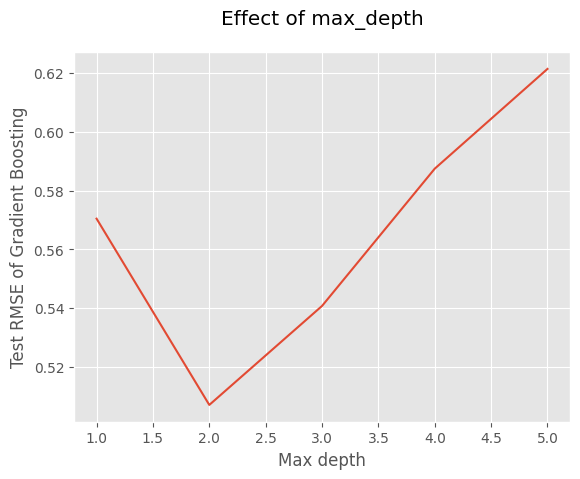

In [19]:
# Measure the effect of max_depth

# In the range of 1 to 5, we’ll measure the effect of max_depth and plot the test RMSE values given by the gradient 
# boosting model.

x = [1, 2, 3, 4, 5]
y = []

for i in x:
  gb = GradientBoostingRegressor(n_estimators=300,
                                 max_depth=i,
                                 learning_rate=1.0)
  
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)

  RMSE= MSE(y_test, y_pred)**0.5
  y.append(RMSE)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.title("Effect of max_depth", pad=20)
plt.xlabel("Max depth")
plt.ylabel("Test RMSE of Gradient Boosting")
plt.plot(x, y)

The best value for max_depth is 2.

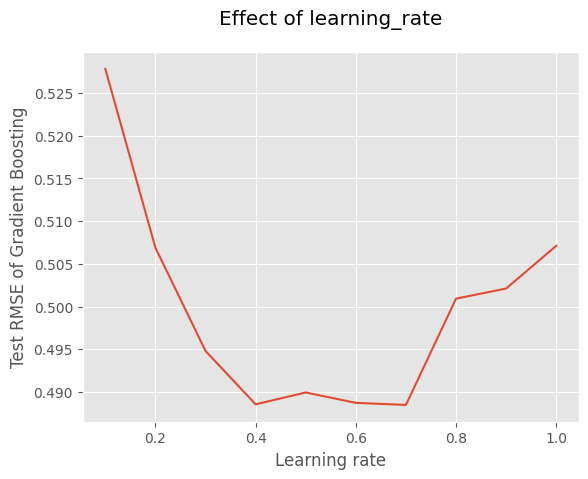

In [20]:
# Measure the effect of learning_rate

# In the range of 0.1 to 1.0, we’ll measure the effect of learning_rate and plot the test RMSE values given by the 
# gradient boosting model.

x = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y = []

for i in x:
  gb = GradientBoostingRegressor(n_estimators=300,
                                 max_depth=2,
                                 learning_rate=i)
  
  gb.fit(X_train, y_train)
  y_pred = gb.predict(X_test)

  RMSE= MSE(y_test, y_pred)**0.5
  y.append(RMSE)

import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.title("Effect of learning_rate", pad=20)
plt.xlabel("Learning rate")
plt.ylabel("Test RMSE of Gradient Boosting")
plt.plot(x, y)

The best learning rate is 0.4 or 0.7.

In [21]:
# Find the optimal hyperparameter values using Random Search

# Here, we use Random Search to find optimal hyperparameter values at once. We can also use Grid Search but it will 
# take hours of time to complete the process.

hyperparameter_space = {'n_estimators':[300, 350, 400, 450, 500], 
                        'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        'max_depth':[1, 2]}

from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(GradientBoostingRegressor(), 
                        param_distributions=hyperparameter_space,
                        n_iter=10, scoring="neg_root_mean_squared_error", 
                        random_state=1, n_jobs=-1, cv=5)


rs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)

Optimal hyperparameter combination: {'n_estimators': 350, 'max_depth': 2, 'learning_rate': 0.4}


You can compare these hyperparameter values with the earlier values which were obtained one by one.